### Tracking Bird Migration to South America

### Introduction 
The purple matrin birds typically spend the summer breeding season in the easter United States, and then migrate to South America for the winter. In this project, we will track the loacations where the birds are more likely to visit.

In South America there are seveal protected areas and for better conservation of these area and to protect the migrated birds from endangerment, it is important to track the protected area to where birds are migrated.

In [9]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

### 1. Load the data

In [3]:
# Load the data
birds_df = pd.read_csv(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\purple_martin.csv', parse_dates=['timestamp'])
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [6]:
# Printing the types of birds
print('There are {} different birds in the dataset.'.format(birds_df['tag-local-identifier'].nunique()))

There are 11 different birds in the dataset.


In [7]:
birds_df['tag-local-identifier'].unique()

array([30448, 30445, 30384, 30380, 30304, 30198, 30048, 30300, 30054,
       30275, 30263], dtype=int64)

The 11 different birds are identified by a unique value. Each bird has sevaral measurements collected at different times of a year.

In [8]:
# let's create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))

# Set the CRS of birds to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}

birds.head()

C:\Users\Rabbil\anaconda3\envs\geopandas_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


### 2. Plot the data

In [11]:
# load in the 'naturalearth_lowres' dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
# create the GeoDataFrame containing boundaries of all countries in America
americas = world[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


Creating a plot that shows both (1) the country boundaries in the americas GeoDataFrame and (2) all of the pints in the birds GeoDataFrame

(-30.0, 60.0)

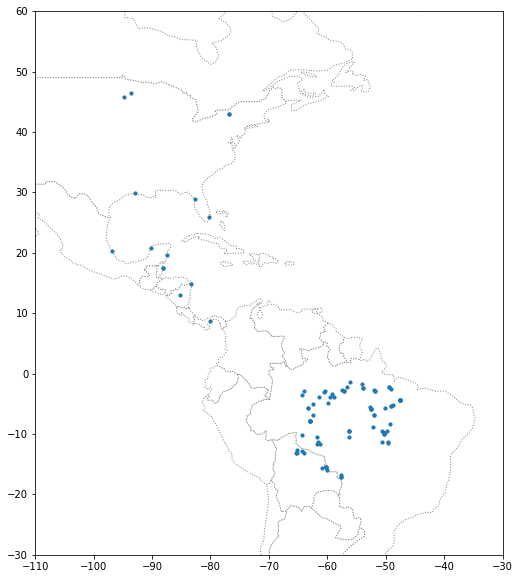

In [15]:
ax= americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10 )

# for zooming in the plot
ax.set_xlim([-110, -30])
ax.set_ylim([-30, 60])

### 3. Creating GeoDataFrame for bird's journey

- For this we need geodataframe containing LineSring object - as it will shows the path of each bird
- we will create a LineString object from a list of Point objects

#### # GeoDataFrame showing path for each bird

In [27]:
path_df = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()

print(type(path_df))
path_df.head()

<class 'pandas.core.frame.DataFrame'>


,tag-local-identifier,geometry
0,30048,"LINESTRING (-90.1299245 20.7324163, -56.293942..."
1,30054,LINESTRING (-93.60860759999998 46.505630200000...
2,30198,"LINESTRING (-80.3103606 25.9254455, -88.146080..."
3,30263,"LINESTRING (-76.78146219999998 42.992085, -62...."
4,30275,"LINESTRING (-76.78213459999998 42.9920688, -60..."


In [29]:
# As we see it is a panda dataframe, so we have to change it to geodataframe
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)

# set the CRS
path_gdf.crs = {'init' :'epsg:4326'}

print(type(path_gdf))
path_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


C:\Users\Rabbil\anaconda3\envs\geopandas_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,"LINESTRING (-90.12992 20.73242, -56.29394 -10...."
1,30054,"LINESTRING (-93.60861 46.50563, -63.28897 -5.7..."
2,30198,"LINESTRING (-80.31036 25.92545, -88.14608 17.5..."
3,30263,"LINESTRING (-76.78146 42.99209, -62.90648 -7.8..."
4,30275,"LINESTRING (-76.78213 42.99207, -60.26131 -15...."


#### Geodataframe showing the starting point for each bird

In [30]:
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()

# converting the df to gdf
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

start_gdf.head()

C:\Users\Rabbil\anaconda3\envs\geopandas_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


#### Geodataframe showing the end point for each bird

In [32]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()

# converting the df to gdf
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}

end_gdf.head()

C:\Users\Rabbil\anaconda3\envs\geopandas_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)


#### Vizualizing the paths of all birds on a single map
#### It will show the journey path (start and end point) of each type of bird

<AxesSubplot:>

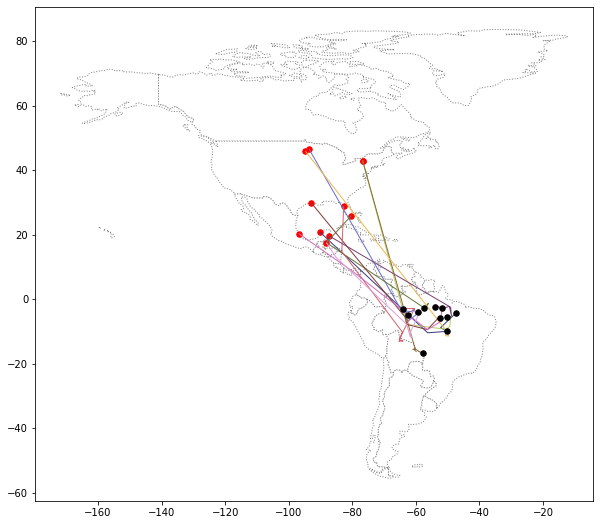

In [36]:
# Plotting all the geodataframe 
# first the americas geodataframe to show the boundaries
ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')

# adding the birth path plot
start_gdf.plot(ax=ax, markersize=30, color='red' )
path_gdf.plot(ax=ax, cmap='tab20b',linestyle='-', linewidth=1, zorder=1 )
end_gdf.plot(ax=ax, markersize=30, color= 'black' )


- From the map, it looks that all the birds migrate to South America
- Now we want to know are the birds going to the protected areas ?

### Where are the protected areas in South America ?

In [38]:
# create geodataframe for protected areas in South America
# Reading the shapefile for protected areas
protected_filepath = r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\SAPA_Aug2019-shapefile\SAPA_Aug2019-shapefile\SAPA_Aug2019-shapefile-polygons.shp'
protected_areas = gpd.read_file(protected_filepath)
protected_areas.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


<AxesSubplot:>

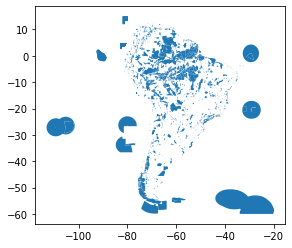

In [39]:
protected_areas.plot()

<AxesSubplot:>

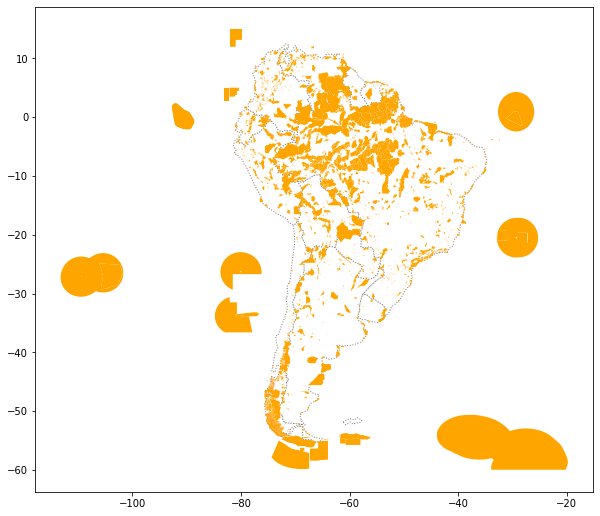

In [41]:
# creating plot that shows the location of protected areas in South America

# making geodataframe for south_america
south_america = americas[americas['continent']=='South America']

# Plotting the protected areas in south america
ax = south_america.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
# adding plot for protected areas
protected_areas.plot(markersize=10, color='orange', ax=ax)

We see that there are protected areas in marine area. As the birds are migrated to the land only, so we will exclude the marine area.

### Precentage of protected land in South America
- For this we first exclude the marine area
- Calculate the total area of protected lands excluding marine area

In [42]:
protected_areas.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'geometry'],
      dtype='object')

In [43]:
Total_protected_area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print('South America has {} square kilometers of protected areas'.format(Total_protected_area))

South America has 5396761.9116883585 square kilometers of protected areas


In [45]:
# now we will calculate the toal area in South America
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


- calculate the area of each country using area attribute of each polygon
- use to_crs as EPSG= 30335
- convert the value into sq. km
- sum up the results

In [50]:
Total_area = sum(south_america.geometry.to_crs(epsg=3035).area)/10**6
print('South America has {} square kilometer of total area'.format(Total_area))

South America has 17759005.81506123 square kilometer of total area


In [54]:
# now calculate what percentage of South America is protected ?
percentage_protected = Total_protected_area / Total_area * 100
print('Approximately {}% of South America is protected'.format(round(percentage_protected, 2)))

Approximately 30.39% of South America is protected


### Are the birds in protected areas of South America ?

<AxesSubplot:>

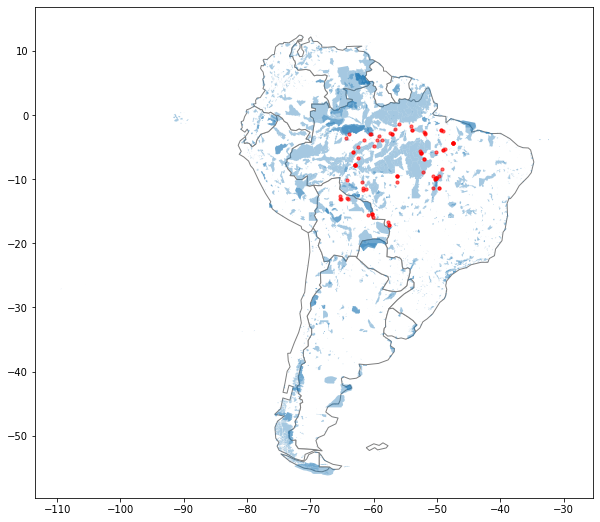

In [61]:
# Plot the location of all protected areas in South America
# Plot all the location of all types of birds in South America (as migrated to)

ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)

- We excluded the marine area in the map as birds are not migrated there

(5.0, -30.0)

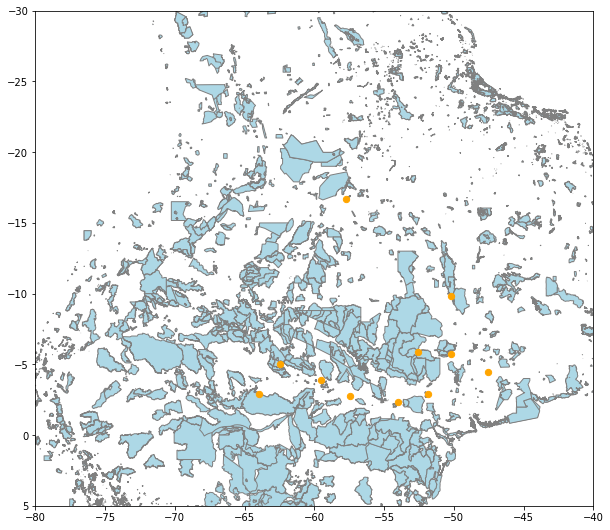

In [65]:
# alternative codes 
ax = protected_areas[protected_areas['MARINE']!='2'].plot(figsize=(10,10), color='lightblue', edgecolor='gray')
end_gdf.plot(markersize=40, color='orange', ax=ax)

# Zooming in the plot
ax.set_xlim([-80, -40])
ax.set_ylim([5, -30])